In [4]:
# Import libraries

import matplotlib.pyplot as plt
import matplotlib as mpl

import cartopy.crs as ccrs
#from cartopy.util import add_cyclic_point

import xarray as xr

import numpy as np

from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

from matplotlib import colorbar, colors

from eofs.xarray import Eof
from pathlib import Path
import sys

In [5]:
path_home = Path.home()
path_home

PosixPath('/home/giodefa')

In [6]:
def searching_model_path(name: str):
    """Insert the name string of the model so i can reach for you"""
    try:
        path_home = Path.home()
        path_directory = path_home / 'Desktop/Unimib/Data Science/Second Year/Physics and environmental data lab/Environmental/Materiale Corso/Final_ex/Model Folder'
        path_model_ls_cm6a = path_directory / name
        if path_model_ls_cm6a.exists() == False:
            sys.exit()
        return path_model_ls_cm6a
    except SystemExit:
        print('Insert string and valid model name')

In [7]:
class SearchingModelPath:

    def __init__(self, searching_model_path=None):
        self.searching_model_path = searching_model_path
    
    def searching_model_path(name: str):
        """Insert the name string of the model so i can reach for you"""
        try:
            path_home = Path.home()
            path_directory = path_home / 'Desktop/Unimib/Data Science/Second Year/Physics and environmental data lab/Environmental/Materiale Corso/Model Folder'
            path_model_ls_cm6a = path_directory / name
            if path_model_ls_cm6a.exists() == False:
                sys.exit()
            return path_model_ls_cm6a
        except SystemExit:
            print('Insert string and valid model name')


In [8]:
SearchingModelPath.searching_model_path('ts_Amon_MIROC6_historical_r1i1p1f1_gn_185001-201412.nc')

PosixPath('/home/giodefa/Desktop/Unimib/Data Science/Second Year/Physics and environmental data lab/Environmental/Materiale Corso/Model Folder/ts_Amon_MIROC6_historical_r1i1p1f1_gn_185001-201412.nc')

In [9]:
path_model_ts_amon_mri =  searching_model_path('ts_Amon_MRI-AGCM3-2-S_highresSST-present_r1i1p1f1_gn_201001-201412(3).nc')
path_model_ts_amon_mri_2h = searching_model_path('ts_Amon_MRI-AGCM3-2-H_highresSST-present_r1i1p1f1_gn_195001-201412.nc')

In [10]:
path_model_ts_amon_hiram_1 = searching_model_path('ts_Amon_HiRAM-SIT-HR_highresSST-present_r1i1p1f1_gn_200801-200812.nc')
path_model_ts_amon_hiram_2 = searching_model_path('ts_Amon_HiRAM-SIT-HR_highresSST-present_r1i1p1f1_gn_200901-200912.nc')
path_model_ts_amon_hiram_3 = searching_model_path('ts_Amon_HiRAM-SIT-HR_highresSST-present_r1i1p1f1_gn_201001-201012.nc')
path_model_ts_amon_hiram_4 = searching_model_path('ts_Amon_HiRAM-SIT-HR_highresSST-present_r1i1p1f1_gn_201101-201112.nc')
path_model_ts_amon_hiram_5 = searching_model_path('ts_Amon_HiRAM-SIT-HR_highresSST-present_r1i1p1f1_gn_201201-201212.nc')
path_model_ts_amon_hiram_6 = searching_model_path('ts_Amon_HiRAM-SIT-HR_highresSST-present_r1i1p1f1_gn_201301-201312.nc')
path_model_ts_amon_hiram_7 = searching_model_path('ts_Amon_HiRAM-SIT-HR_highresSST-present_r1i1p1f1_gn_201401-201412.nc')

In [54]:
model_hiram_1 = xr.open_dataset(path_model_ts_amon_hiram_1)

model_hiram = xr.concat([
    xr.open_dataset(path_model_ts_amon_hiram_1),
    xr.open_dataset(path_model_ts_amon_hiram_2),
    xr.open_dataset(path_model_ts_amon_hiram_3),
    xr.open_dataset(path_model_ts_amon_hiram_4),
    xr.open_dataset(path_model_ts_amon_hiram_5),
    xr.open_dataset(path_model_ts_amon_hiram_6),
    xr.open_dataset(path_model_ts_amon_hiram_7),
], dim = "time")
model_hiram = model_hiram.sel(time=slice('2010-01','2014-12'))

In [12]:
temperature_surface_model_hiram = model_hiram.ts - 273.15
temperature_surface_model_hiram

<xarray.DataArray 'ts' (time: 60, lat: 768, lon: 1536)>
array([[[-27.17215 , -27.17215 , -27.17215 , ..., -27.17215 ,
         -27.17215 , -27.17215 ],
        [-26.973328, -26.973785, -26.974243, ..., -26.97197 ,
         -26.972427, -26.97287 ],
        [-26.879227, -26.879395, -26.879562, ..., -26.878723,
         -26.878891, -26.879059],
        ...,
        [-28.057281, -28.057892, -28.058517, ..., -28.05545 ,
         -28.05606 , -28.056671],
        [-28.298874, -28.299286, -28.299683, ..., -28.297653,
         -28.29805 , -28.298462],
        [-28.477097, -28.477097, -28.477097, ..., -28.477097,
         -28.477097, -28.477097]],

       [[-33.85408 , -33.85408 , -33.85408 , ..., -33.85408 ,
         -33.85408 , -33.85408 ],
        [-33.72206 , -33.722366, -33.722656, ..., -33.72116 ,
         -33.72145 , -33.721756],
        [-33.80327 , -33.802963, -33.802643, ..., -33.8042  ,
         -33.803894, -33.803574],
...
        [-27.849838, -27.849731, -27.849625, ..., -27.850174,
         -27.850067, -27.84996 ],
        [-27.811356, -27.811325, -27.81131 , ..., -27.811417,
         -27.811401, -27.81137 ],
        [-27.801437, -27.801437, -27.801437, ..., -27.801437,
         -27.801437, -27.801437]],

       [[-26.579361, -26.579361, -26.579361, ..., -26.579361,
         -26.579361, -26.579361],
        [-26.439636, -26.439957, -26.440277, ..., -26.438675,
         -26.438995, -26.439316],
        [-26.415955, -26.41594 , -26.41594 , ..., -26.41597 ,
         -26.41597 , -26.415955],
        ...,
        [-27.41307 , -27.412903, -27.412735, ..., -27.41359 ,
         -27.413406, -27.413239],
        [-27.356964, -27.35698 , -27.35701 , ..., -27.356888,
         -27.356918, -27.356934],
        [-27.367508, -27.367508, -27.367508, ..., -27.367508,
         -27.367508, -27.367508]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2010-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float64 -89.88 -89.65 -89.41 -89.18 ... 89.41 89.65 89.88
  * lon      (lon) float64 0.1172 0.3516 0.5859 0.8203 ... 359.4 359.6 359.9

In [59]:
model_mri = xr.open_dataset(path_model_ts_amon_mri)
temperature_surface_mri = model_mri.ts - 273.15
temperature_surface_mri

<xarray.DataArray 'ts' (time: 60, lat: 960, lon: 1920)>
array([[[-25.986008, -25.988113, -25.990234, ..., -25.996384,
         -26.000198, -25.984344],
        [-25.796295, -25.799194, -25.801743, ..., -25.807358,
         -25.80893 , -25.794983],
        [-25.550644, -25.550278, -25.549347, ..., -25.557587,
         -25.554108, -25.55362 ],
        ...,
        [-36.694595, -36.693253, -36.692307, ..., -36.696823,
         -36.696182, -36.695297],
        [-36.55638 , -36.555283, -36.554016, ..., -36.557205,
         -36.556564, -36.557037],
        [-36.403458, -36.404434, -36.403473, ..., -36.403366,
         -36.404037, -36.403214]],

       [[-36.971893, -36.957718, -36.962097, ..., -36.969025,
         -36.971222, -36.974716],
        [-36.81317 , -36.800186, -36.802475, ..., -36.805832,
         -36.808   , -36.811447],
        [-36.56662 , -36.5661  , -36.56488 , ..., -36.57144 ,
         -36.568604, -36.5679  ],
...
        [-26.289917, -26.287537, -26.294586, ..., -26.28447 ,
         -26.290253, -26.287277],
        [-26.31073 , -26.301743, -26.307419, ..., -26.307129,
         -26.302475, -26.303055],
        [-26.336807, -26.341797, -26.337555, ..., -26.345703,
         -26.34018 , -26.33841 ]],

       [[-24.08371 , -24.084045, -24.085358, ..., -24.08287 ,
         -24.084259, -24.085861],
        [-24.049332, -24.048172, -24.050674, ..., -24.042877,
         -24.044907, -24.047165],
        [-23.943542, -23.945343, -23.946823, ..., -23.93547 ,
         -23.937592, -23.94107 ],
        ...,
        [-29.64746 , -29.639542, -29.652939, ..., -29.640182,
         -29.65422 , -29.64476 ],
        [-29.631165, -29.611526, -29.618652, ..., -29.62912 ,
         -29.617691, -29.617554],
        [-29.65355 , -29.664673, -29.657303, ..., -29.668213,
         -29.658585, -29.654633]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2010-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float64 -89.86 -89.67 -89.48 -89.3 ... 89.3 89.48 89.67 89.86
  * lon      (lon) float64 0.0 0.1875 0.375 0.5625 ... 359.2 359.4 359.6 359.8

In [14]:
print(f'il numero di lon è {len(temperature_surface_mri.lon)} e il numero di lat è {len(temperature_surface_mri.lat)}')

il numero di lon è 1920 e il numero di lat è 960


In [15]:
print(f'il numero di lon è {len(temperature_surface_model_hiram.lon)} e il numero di lat è {len(temperature_surface_model_hiram.lat)}')

il numero di lon è 1536 e il numero di lat è 768


In [16]:
d1.coords['lon'] = (d1.coords['lon'] + 180) % 360 - 180
d1 = d1.sortby(d1.lon)

NameError: name 'd1' is not defined

Text(0.5, 1.0, 'Temperature')

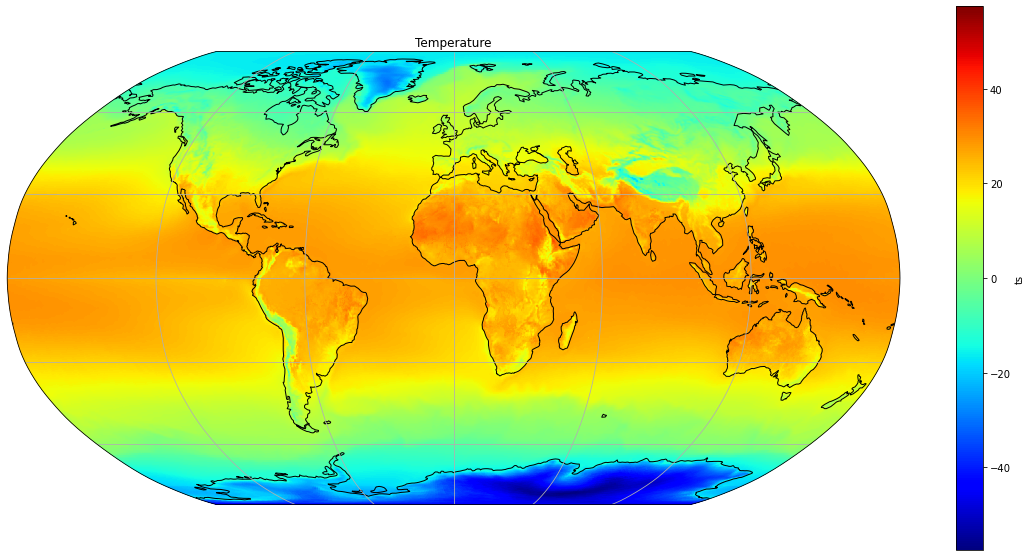

In [17]:
fig = plt.figure(figsize=(20, 10))
p0 = temperature_surface_model_hiram.mean('time').plot(transform=ccrs.PlateCarree(),subplot_kws={'projection': ccrs.Robinson()},
                            cmap='jet')
p0.axes.coastlines()
p0.axes.gridlines()
plt.rcParams["figure.figsize"] = (10,10)
plt.title('Temperature' )

Text(0.5, 1.0, 'Temperature')

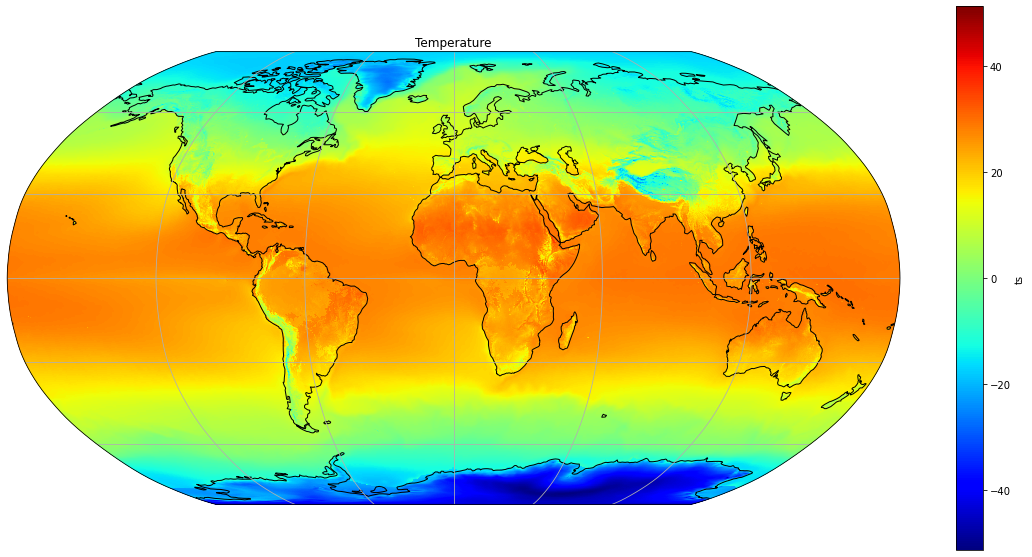

In [18]:
fig = plt.figure(figsize=(20, 10))
p0 = temperature_surface_mri.mean('time').plot(transform=ccrs.PlateCarree(),subplot_kws={'projection': ccrs.Robinson()},
                            cmap='jet')
p0.axes.coastlines()
p0.axes.gridlines()
plt.rcParams["figure.figsize"] = (10,10)
plt.title('Temperature' )

# Project

- The idea is using two or more model try to apply some sort of clustering methods, so i want to divide my project in two part, one is for the spatial clustering, so i want to slice my maps into smaller part and try to cluster it, maybe i can take only one specific periods(2000-2014) take the anomalies.
- and the second part is using time series, so i have to aggregate in the spatial way my info, try to do some sort of time series clustering, something like my data science lab project.

so the first part of the project is trying to subdivide my area in subgrups. the only things that is have to take in mind is that i have to try to take the spacial information with all the data

In [60]:
model_mri_interp_celsius_mean_time = model_mri_interp.mean('time', keep_attrs=True)
model_hiram_celsius_mean_time = model_hiram.mean('time', keep_attrs=True)

ens = model_mri_interp_celsius_mean_time.merge(model_hiram_celsius_mean_time.ts.rename('ts2'))
ens

<xarray.Dataset>
Dimensions:   (lat: 768, bnds: 2, lon: 1536)
Coordinates:
  * lat       (lat) float64 -89.88 -89.65 -89.41 -89.18 ... 89.41 89.65 89.88
  * lon       (lon) float64 0.1172 0.3516 0.5859 0.8203 ... 359.4 359.6 359.9
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds) float64 nan nan -89.74 -89.55 ... 89.55 89.74 nan nan
    lon_bnds  (lon, bnds) float64 0.02344 0.2109 0.2578 0.4453 ... 359.7 nan nan
    ts        (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    ts2       (lat, lon) float32 230.0 230.0 230.0 230.0 ... 256.7 256.7 256.7
Attributes: (12/36)
    Conventions:           CF-1.7 CMIP-6.2
    activity_id:           HighResMIP
    branch_method:         no parent
    creation_date:         2019-06-12T08:35:27Z
    data_specs_version:    01.00.23
    experiment:            forced atmosphere experiment for 1950-2014
    ...                    ...
    title:                 MRI-AGCM3-2-S output prepared for CMIP6
    variable_id:           ts
    variant_label:         r1i1p1f1
    license:               CMIP6 model data produced by MRI is licensed under...
    cmor_version:          3.3.2
    tracking_id:           hdl:21.14100/bdb472b5-bfd5-4ec7-84c3-cfcb3291f310

In [61]:
ens_mean = ens.to_array(dim='new').mean('new')
ens_stdev = ens.to_array(dim='new2').std('new2')

ens['ens_mean'] = ens_mean - 273.15 # convert to Celsius
ens['ens_stdev'] = ens_stdev

ens.ens_mean

<xarray.DataArray 'ens_mean' (lat: 768, bnds: 2, lon: 1536)>
array([[[-158.13750305, -158.02031555, -157.90312805, ...,
           21.51093445,   21.62812195,  -43.1484436 ],
        [-158.04375305, -157.92656555, -157.80937805, ...,
           21.60468445,   21.72187195,  -43.1484436 ]],

       [[-180.44813542, -180.38974507, -180.33187878, ...,
          -90.62271614,  -90.5646684 , -202.90154552],
        [-180.3546453 , -180.29625495, -180.23838866, ...,
          -90.52922602,  -90.47117829, -202.80831529]],

       [[-180.4235624 , -180.36511332, -180.30667025, ...,
          -90.59929257,  -90.54078891, -202.93035258],
        [-180.32990781, -180.27145874, -180.21301567, ...,
          -90.50563798,  -90.44713433, -202.83679342]],

       ...,

       [[-122.62195014, -122.56378337, -122.50365391, ...,
          -32.798729  ,  -32.74027027, -100.12859659],
        [-122.52829556, -122.47012878, -122.40999933, ...,
          -32.70507442,  -32.64661568, -100.03503743]],

       [[-122.57144235, -122.51291273, -122.45383039, ...,
          -32.74827961,  -32.68928366, -100.007592  ],
        [-122.47795223, -122.41942262, -122.36034028, ...,
          -32.65478949,  -32.59579355,  -99.91436177]],

       [[-144.7712616 , -144.6540741 , -144.5368866 , ...,
           34.8771759 ,   34.9943634 ,  -16.41596069],
        [-144.6775116 , -144.5603241 , -144.4431366 , ...,
           34.9709259 ,   35.0881134 ,  -16.41596069]]])
Coordinates:
  * lat      (lat) float64 -89.88 -89.65 -89.41 -89.18 ... 89.41 89.65 89.88
  * lon      (lon) float64 0.1172 0.3516 0.5859 0.8203 ... 359.4 359.6 359.9
Dimensions without coordinates: bnds

In [62]:
fig = plt.figure(figsize=(20, 10))
p0 = ens.ens_mean.plot(transform=ccrs.PlateCarree(),subplot_kws={'projection': ccrs.Robinson()},
                            cmap='jet')
p0.axes.coastlines()
p0.axes.gridlines()
plt.rcParams["figure.figsize"] = (10,10)
plt.title('Temperature' )

AttributeError: 'Rectangle' object has no property 'cmap'

ValueError: Axes should be an instance of GeoAxes, got <class 'matplotlib.axes._subplots.AxesSubplot'>

<Figure size 1440x720 with 1 Axes>

In [58]:
model_mri_interp = model_mri.copy()
model_mri_interp = model_mri_interp.interp(lat=model_hiram.lat, lon=model_hiram.lon, method='linear')

/home/giodefa/anaconda3/envs/final_exam_envi/lib/python3.10/site-packages/xarray/core/missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/giodefa/anaconda3/envs/final_exam_envi/lib/python3.10/site-packages/xarray/core/missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
/home/giodefa/anaconda3/envs/final_exam_envi/lib/python3.10/site-packages/xarray/core/missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/giodefa/anaconda3/envs/final_exam_envi/lib/python3.10/site-packages/xarray/c

In [20]:
print(f'il numero di lon è {len(model_mri_interp.lon)} e il numero di lat è {len(model_mri_interp.lat)}')
print(f'il numero di lon è {len(model_hiram.lon)} e il numero di lat è {len(model_hiram.lat)}')

il numero di lon è 1536 e il numero di lat è 768
il numero di lon è 1536 e il numero di lat è 768


In [57]:
model_mri_interp_celsius_mean_time = (model_mri_interp.ts - 273.15).mean('time')
model_hiram_celsius_mean_time = (model_hiram.ts - 273.15 ).mean('time')

Text(0.5, 1.0, 'Temperature')

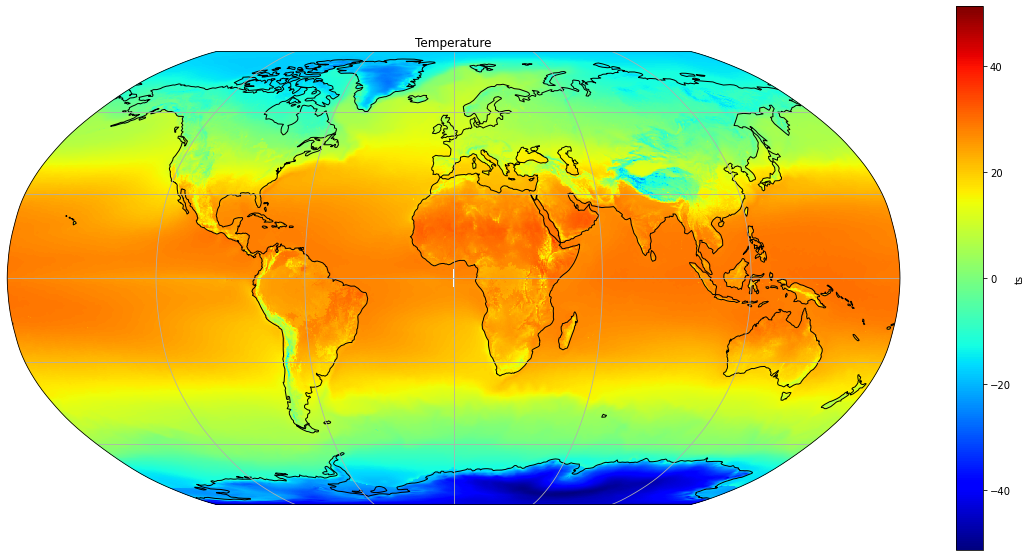

In [29]:
fig = plt.figure(figsize=(20, 10))
p0 = model_mri_interp_celsius_mean_time.plot(transform=ccrs.PlateCarree(),subplot_kws={'projection': ccrs.Robinson()},
                            cmap='jet')
p0.axes.coastlines()
p0.axes.gridlines()
plt.rcParams["figure.figsize"] = (10,10)
plt.title('Temperature' )

In [ ]:
fig = plt.figure(figsize=(20, 10))
d1_nat = d1.sel(lat=slice(20,80), lon=slice(-45,22))
psl_nat=(d1.ts)- 273.15

ax = plt.axes(projection=ccrs.Robinson())
ax.set_title(''.join(['ts_Amon_MIROC6_historical_r1i1p1f1_gn_185001-201412.nc','\n']))
ax.set_global()

mm = ax.contourf(psl_nat.lon, psl_nat.lat, psl_nat.mean(axis=0), \
                   transform=ccrs.PlateCarree(),cmap='jet' )

ax.coastlines()
ax.gridlines(draw_labels=True)

#- add colorbar
cbar_ax = fig.add_axes([0.28, 0.10, 0.46, 0.05]) #[left, bottom, width, height]
cbar = fig.colorbar(mm, cax=cbar_ax, extend='both', orientation='horizontal')
cbar.set_label('C')
cbar.ax.tick_params(labelsize=8)

plt.show()
plt.close()

In [28]:
model_mri_interp_celsius_mean_time

<xarray.DataArray 'ts' (lat: 768, lon: 1536)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [-42.86233883, -42.86258784, -42.86496363, ..., -42.85910835,
        -42.86081939,          nan],
       [-42.70792796, -42.70957479, -42.71109303, ..., -42.70480921,
        -42.70614614,          nan],
       ...,
       [-17.10410589, -17.10584433, -17.09973204, ..., -17.10800479,
        -17.10857538,          nan],
       [-17.14399237, -17.1442489 , -17.14229455, ..., -17.14821642,
        -17.14663815,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])
Coordinates:
  * lat      (lat) float64 -89.88 -89.65 -89.41 -89.18 ... 89.41 89.65 89.88
  * lon      (lon) float64 0.1172 0.3516 0.5859 0.8203 ... 359.4 359.6 359.9

In [26]:
model_hiram_celsius_mean_time

<xarray.DataArray 'ts' (lat: 768, lon: 1536)>
array([[-43.148426, -43.148426, -43.148426, ..., -43.148426, -43.148426,
        -43.148426],
       [-42.91221 , -42.912746, -42.91329 , ..., -42.910595, -42.911137,
        -42.91168 ],
       [-43.202156, -43.20117 , -43.200195, ..., -43.20509 , -43.20412 ,
        -43.203144],
       ...,
       [-16.427622, -16.427603, -16.427582, ..., -16.427681, -16.427664,
        -16.427645],
       [-16.420162, -16.420155, -16.420143, ..., -16.420189, -16.42018 ,
        -16.42017 ],
       [-16.415998, -16.415998, -16.415998, ..., -16.415998, -16.415998,
        -16.415998]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.88 -89.65 -89.41 -89.18 ... 89.41 89.65 89.88
  * lon      (lon) float64 0.1172 0.3516 0.5859 0.8203 ... 359.4 359.6 359.9

In [43]:
ensamble_model = model_hiram_celsius_mean_time.merge(model_mri_interp_celsius_mean_time.rename('ts2'))

AttributeError: 'DataArray' object has no attribute 'merge'

In [33]:
fig = plt.figure(figsize=(20, 10))
p0 = mod_ens.plot(transform=ccrs.PlateCarree(),subplot_kws={'projection': ccrs.Robinson()},
                            cmap='jet')
p0.axes.coastlines()
p0.axes.gridlines()
plt.rcParams["figure.figsize"] = (10,10)
plt.title('Temperature' )

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

<Figure size 1440x720 with 0 Axes>